Premières lignes des données :
         Date  ID_Joueur   Temps_Jeu  Victoires  Achats_Objets  Satisfaction  \
0  2023-01-07       1943  100.913289          1              0          71.3   
1  2023-01-20       1943  103.048186          1             50          75.9   
2  2023-01-29       1943  176.132234          1             50          86.4   
3  2023-01-15       1943   94.473477          0              0          94.6   
4  2023-01-11       1943  193.236652          3             50          55.9   

  Région Serveur   Latitude   Longitude  
0     OC  Stable  30.432320   96.947262  
1     EU  Stable   5.541137  -89.395196  
2     AS  Stable -54.947640  -37.501899  
3     AF  Stable -66.108038 -162.469859  
4     AF  Stable -34.836281 -134.227974  

Colonnes avec des valeurs manquantes et leur proportion :
               Valeurs Manquantes  Proportion (%)
Date                            0            0.00
ID_Joueur                       0            0.00
Temps_Jeu                  

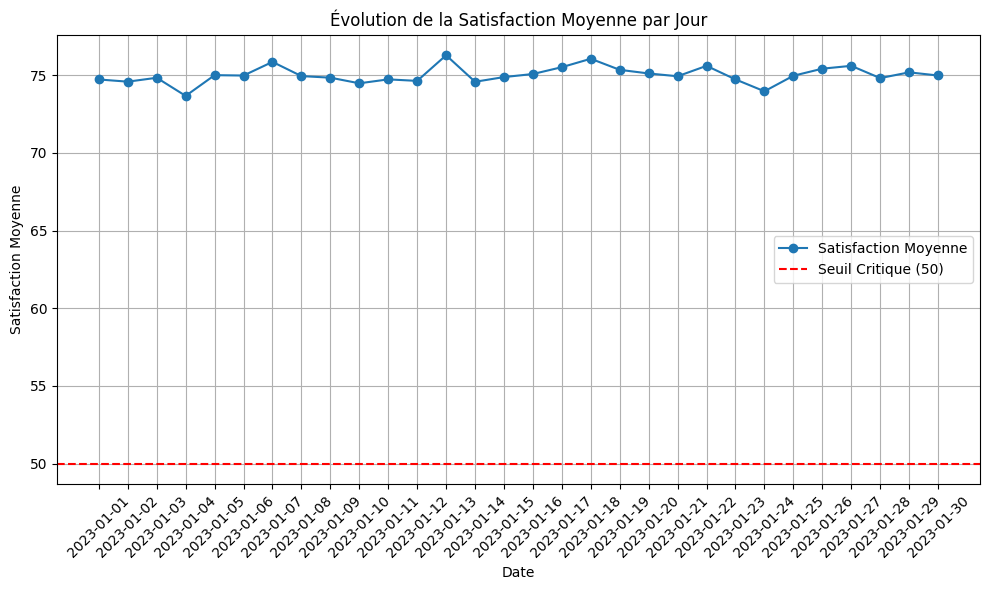

In [1]:
#Mission 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "/Users/adrienmiller/Downloads/game_data_complete.csv"
data = pd.read_csv(file_path)

# Affiche les 5 premières lignes
print("Premières lignes des données :")
print(data.head())

# Identifie les colonnes avec des valeurs manquantes et leur proportion
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
print("\nColonnes avec des valeurs manquantes et leur proportion :")
print(pd.DataFrame({'Valeurs Manquantes': missing_values, 'Proportion (%)': missing_percentage}))

# Compte le nombre unique de joueurs
unique_players = data['ID_Joueur'].nunique()
print(f"\nNombre unique de joueurs : {unique_players}")

# Objectif additionnel 

# Vérifie les statistiques globales
print("\nStatistiques globales des données :")
print(data.describe())

# Trouve les jours où les serveurs sont hors ligne
offline_days = data[data['Serveur'] == 'Offline']['Date'].unique()
print("\nJours où les serveurs sont hors ligne :")
print(offline_days)

# Filtre les données pour ces jours et analyser leur impact sur les achats
if len(offline_days) > 0:
    offline_data = data[data['Date'].isin(offline_days)]
    avg_impact = offline_data['Achats_Objets'].mean()
    print(f"\nImpact moyen des jours hors ligne sur les achats : {avg_impact}")
else:
    print("\nAucun jour hors ligne trouvé dans les données.")

# Visualise la satisfaction moyenne par jour
plt.figure(figsize=(10, 6))
satisfaction_by_date = data.groupby('Date')['Satisfaction'].mean()
plt.plot(satisfaction_by_date.index, satisfaction_by_date.values, marker='o', label='Satisfaction Moyenne')
plt.axhline(y=50, color='r', linestyle='--', label='Seuil Critique (50)')
plt.xlabel("Date")
plt.ylabel("Satisfaction Moyenne")
plt.title("Évolution de la Satisfaction Moyenne par Jour")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Les 5 joueurs les plus actifs :
ID_Joueur
1561    3995.501446
1517    3976.710036
1695    3974.456850
1483    3943.158482
1578    3907.477029
Name: Temps_Jeu, dtype: float64

Joueurs ayant une satisfaction inférieure à 60 :
[1943 1822 1653 1182 1236 1695 1722 1973 1772 1608 1129 1146 1468 1839
 1523 1892 1751 1511 1126 1123 1049 1954 1786 1518 1540 1823 1573 1396
 1401 1799 1351 1276 1662 1266 1999 1456 1977 1078 1561 1991 1069 1298
 1975 1005 1590 1734 1952 1646 1015 1208 1394 1152 1735 1295 1879 1368
 1980 1102 1856 1478 1327 1888 1575 1149 1557 1780 1249 1288 1998 1800
 1647 1283 1533 1920 1985 1066 1376 1197 1032 1941 1103 1100 1274 1109
 1749 1239 1817 1294 1588 1194 1450 1260 1763 1045 1355 1286 1617 1187
 1597 1538 1077 1683 1874 1057 1818 1863 1108 1509 1916 1494 1483 1019
 1972 1313 1395 1314 1460 1063 1719 1440 1432 1665 1651 1022 1128 1496
 1403 1766 1891 1117 1284 1836 1881 1332 1229 1833 1101 1192 1002 1716
 1441 1487 1748 1350 1373 1730 1840 1893 1099 1072 1526 1804 1703

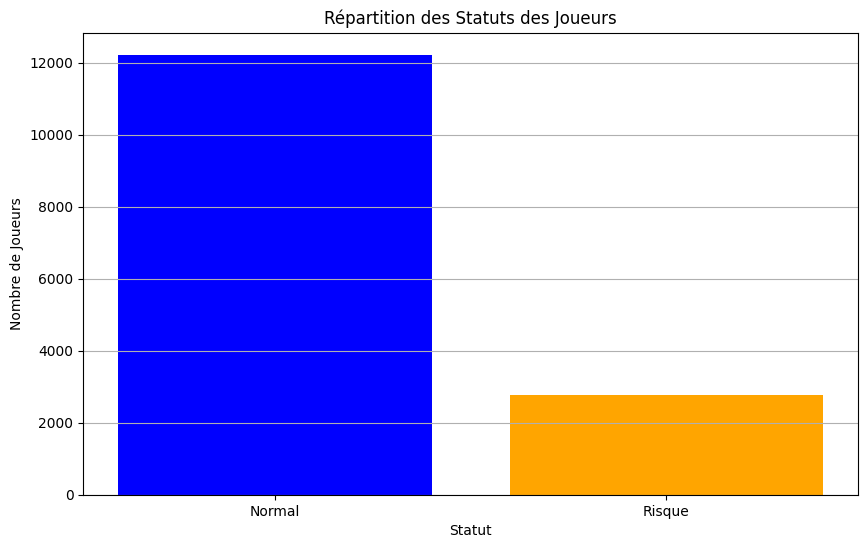

In [2]:
# Mission 2 

# Calcule le temps total de jeu par joueur
total_playtime = data.groupby('ID_Joueur')['Temps_Jeu'].sum()

# Affiche les 5 joueurs les plus actifs
most_active_players = total_playtime.sort_values(ascending=False).head(5)
print("\nLes 5 joueurs les plus actifs :")
print(most_active_players)

# Identifie les joueurs ayant une satisfaction inférieure à 60
low_satisfaction = data[data['Satisfaction'] < 60]['ID_Joueur'].unique()
print("\nJoueurs ayant une satisfaction inférieure à 60 :")
print(low_satisfaction)

# Objectif additionnel 

top_10_active = total_playtime.sort_values(ascending=False).head(10)
print("\nTop 10 des joueurs les plus actifs :")
print(top_10_active)

# Ajoute une nouvelle colonne "Statut"
data['Statut'] = "Normal"  

# Marque les joueurs très actifs comme "VIP"
data.loc[data['ID_Joueur'].isin(total_playtime[total_playtime > 4000].index), 'Statut'] = "VIP"

# Marque les joueurs insatisfaits comme "Risque"
data.loc[data['Satisfaction'] < 60, 'Statut'] = "Risque"

# Vérifie les statuts ajoutés
print("\nStatut des joueurs dans les données :")
print(data[['ID_Joueur', 'Statut']].drop_duplicates().head(20))

# Visualisation des statut des joueurs les plus actifs
plt.figure(figsize=(10, 6))
status_counts = data['Statut'].value_counts()
plt.bar(status_counts.index, status_counts.values, color=['blue', 'orange', 'green'])
plt.title("Répartition des Statuts des Joueurs")
plt.xlabel("Statut")
plt.ylabel("Nombre de Joueurs")
plt.grid(axis='y')
plt.show()

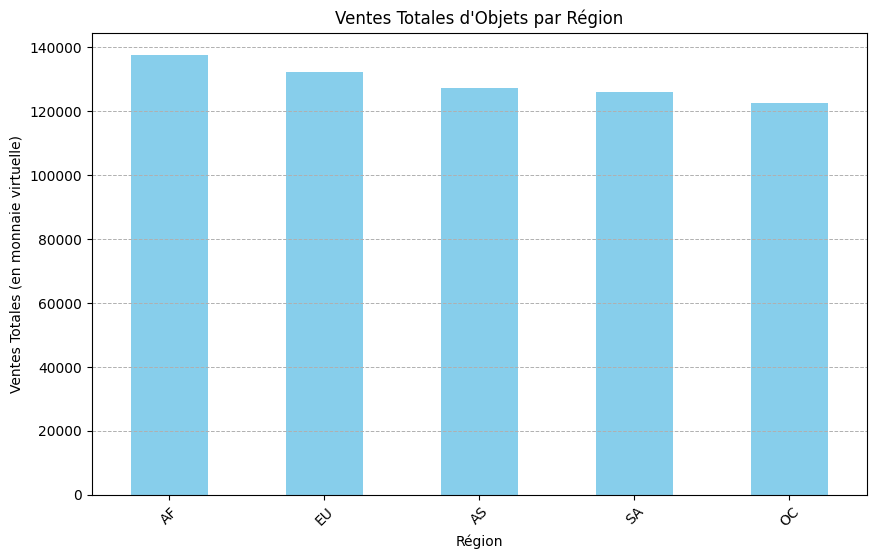

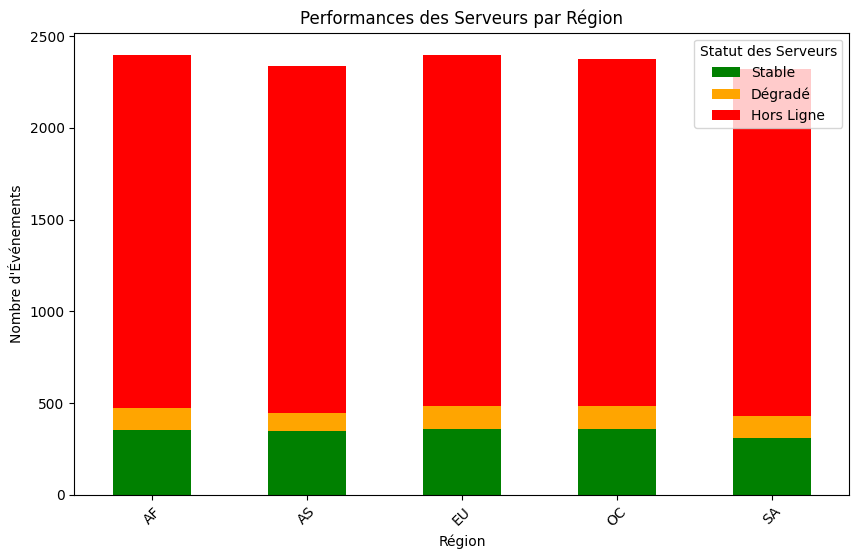

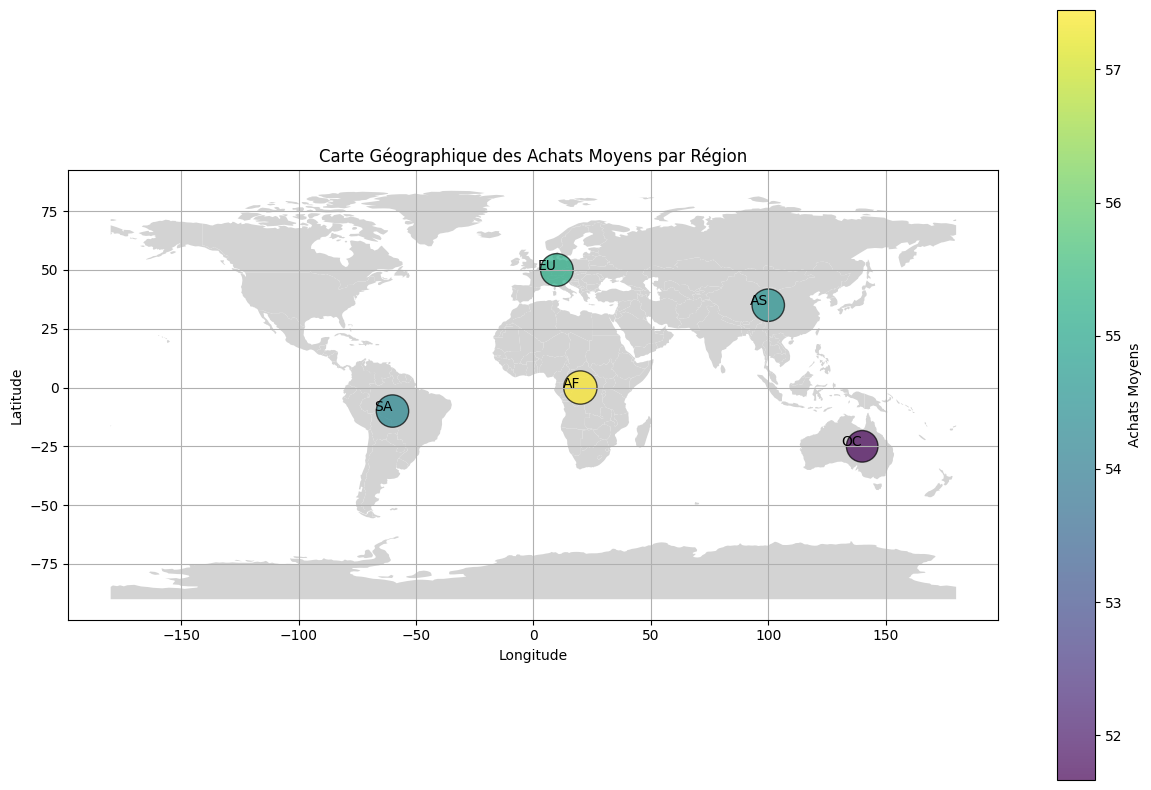

In [4]:
# Question 3
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Tâche 1 : Créer un graphique des ventes totales d'objets par région
total_sales_by_region = data.groupby('Région')['Achats_Objets'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
total_sales_by_region.plot(kind='bar', color='skyblue')
plt.title("Ventes Totales d'Objets par Région")
plt.xlabel("Région")
plt.ylabel("Ventes Totales (en monnaie virtuelle)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

# Tâche 2 : Représenter les performances des serveurs par région
server_performance = data.groupby(['Région', 'Serveur']).size().unstack().fillna(0)

server_performance.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'orange', 'red'])
plt.title("Performances des Serveurs par Région")
plt.xlabel("Région")
plt.ylabel("Nombre d'Événements")
plt.xticks(rotation=45)
plt.legend(title="Statut des Serveurs", labels=['Stable', 'Dégradé', 'Hors Ligne'])
plt.show()

# Tâche 3 : Créer une carte géographique des achats moyens par région
# Données fictives pour géolocalisation des régions
region_coordinates = {
    'EU': (10, 50),
    'NA': (-100, 40),
    'AS': (100, 35),
    'SA': (-60, -10),
    'OC': (140, -25),
    'AF': (20, 0)
}

# Calcul des achats moyens par région
mean_sales_by_region = data.groupby('Région')['Achats_Objets'].mean()

# Créer un DataFrame pour la carte
geo_data = pd.DataFrame({
    'Région': mean_sales_by_region.index,
    'Achats_Moyens': mean_sales_by_region.values,
    'Latitude': [region_coordinates[region][1] for region in mean_sales_by_region.index],
    'Longitude': [region_coordinates[region][0] for region in mean_sales_by_region.index]
})

# Charger une carte géographique de base avec GeoPandas
world = gpd.read_file("/Users/adrienmiller/Downloads/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

# Tracer la carte
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')

# Ajouter les régions avec les achats moyens
scatter = plt.scatter(
    geo_data['Longitude'], geo_data['Latitude'], 
    s=geo_data['Achats_Moyens'] * 10,  # Taille proportionnelle aux achats moyens
    c=geo_data['Achats_Moyens'], cmap='viridis', alpha=0.7, edgecolor='k'
)

# Ajouter une légende et des annotations
plt.colorbar(scatter, label="Achats Moyens")
for i, row in geo_data.iterrows():
    plt.text(row['Longitude'], row['Latitude'], row['Région'], fontsize=10, ha='right')

plt.title("Carte Géographique des Achats Moyens par Région")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()


Régression Linéaire :
Mean Squared Error (MSE) : 12524.955300751502
R² Score : 0.00013287075904200307

Arbre de Décision :
Mean Squared Error (MSE) : 23909.12691375226
R² Score : -0.908665501463054

SVM :
Mean Squared Error (MSE) : 15473.291860228228
R² Score : -0.23523282444493843


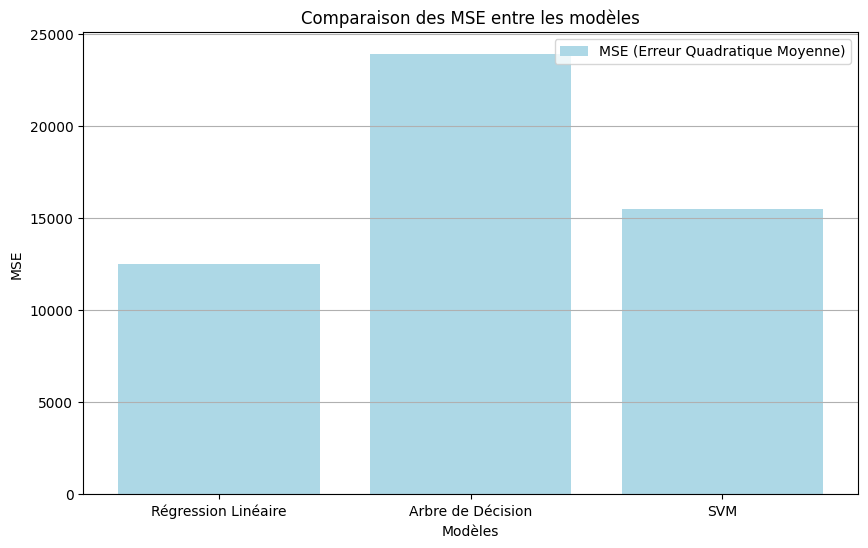

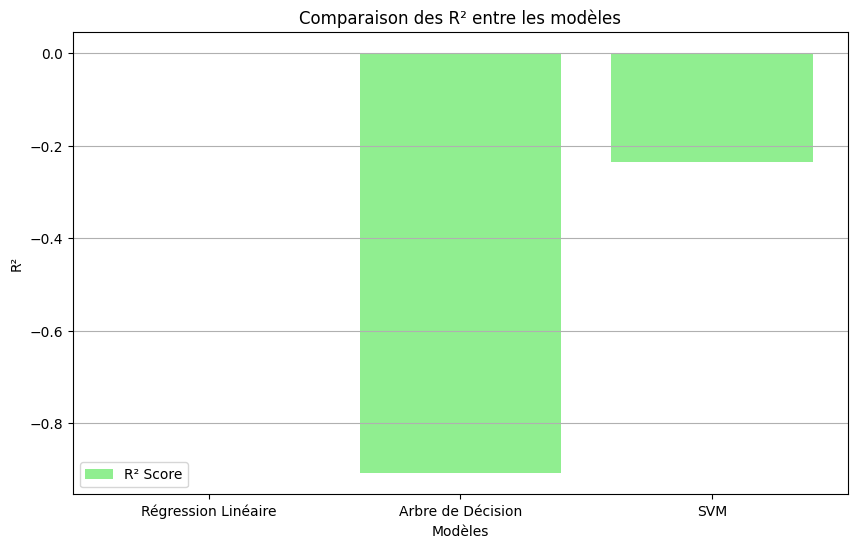

In [5]:
# Question 4
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


file_path = "/Users/adrienmiller/Downloads/game_data_complete.csv"
data = pd.read_csv(file_path)

# Préparer les données pour le modèle
# Features : Temps_Jeu et Victoires, Cible : Achats_Objets
X = data[['Temps_Jeu', 'Victoires']].fillna(0)  # Remplacer les valeurs manquantes par 0
y = data['Achats_Objets'].fillna(0)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tâche 1 : Entraîner un modèle de régression linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Prédictions avec le modèle de régression linéaire
y_pred_lin = lin_reg.predict(X_test)

# Évaluer le modèle de régression linéaire
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("\nRégression Linéaire :")
print(f"Mean Squared Error (MSE) : {mse_lin}")
print(f"R² Score : {r2_lin}")

# Tâche 2 : Évaluer d'autres modèles
# Modèle Arbre de Décision
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("\nArbre de Décision :")
print(f"Mean Squared Error (MSE) : {mse_tree}")
print(f"R² Score : {r2_tree}")

# Modèle SVM
svm_reg = SVR(kernel='rbf')
svm_reg.fit(X_train, y_train)
y_pred_svm = svm_reg.predict(X_test)

mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print("\nSVM :")
print(f"Mean Squared Error (MSE) : {mse_svm}")
print(f"R² Score : {r2_svm}")

# Compare les performances
models = ['Régression Linéaire', 'Arbre de Décision', 'SVM']
mse_scores = [mse_lin, mse_tree, mse_svm]
r2_scores = [r2_lin, r2_tree, r2_svm]

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.bar(models, mse_scores, color='lightblue', label="MSE (Erreur Quadratique Moyenne)")
plt.title("Comparaison des MSE entre les modèles")
plt.xlabel("Modèles")
plt.ylabel("MSE")
plt.grid(axis='y')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color='lightgreen', label="R² Score")
plt.title("Comparaison des R² entre les modèles")
plt.xlabel("Modèles")
plt.ylabel("R²")
plt.grid(axis='y')
plt.legend()
plt.show()


Joueurs avec un temps de jeu anormal :
       ID_Joueur   Temps_Jeu
300         1129   30.000000
383         1468  213.530434
450         1892   31.372532
465         1892   30.000000
601         1049  203.766266
...          ...         ...
13972       1023   34.544187
14092       1610   31.043684
14214       1040   36.744346
14581       1787   30.000000
14780       1107  228.340502

[112 rows x 2 columns]

Joueurs avec un nombre de victoires anormal :
Empty DataFrame
Columns: [ID_Joueur, Victoires]
Index: []

Joueurs suspects identifiés :
       ID_Joueur   Temps_Jeu  Victoires
300         1129   30.000000          1
383         1468  213.530434          1
450         1892   31.372532          2
465         1892   30.000000          1
601         1049  203.766266          1
...          ...         ...        ...
13972       1023   34.544187          0
14092       1610   31.043684          1
14214       1040   36.744346          1
14581       1787   30.000000          1
14780       

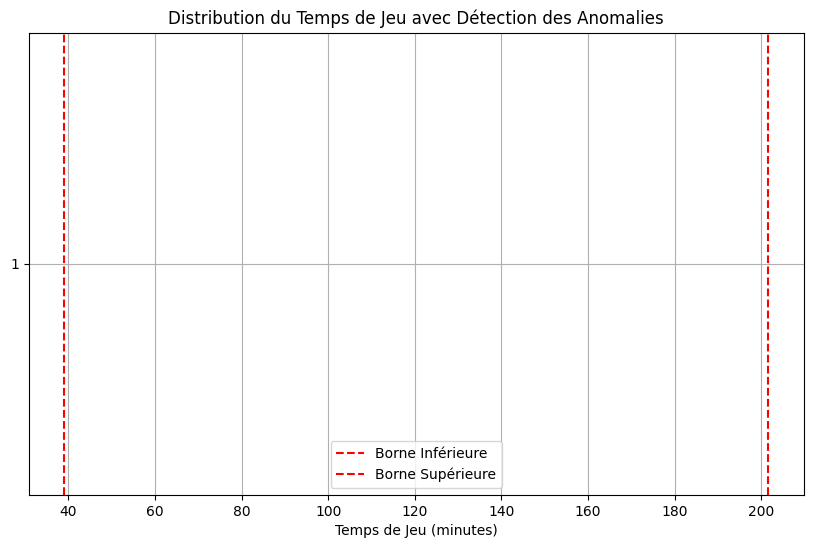

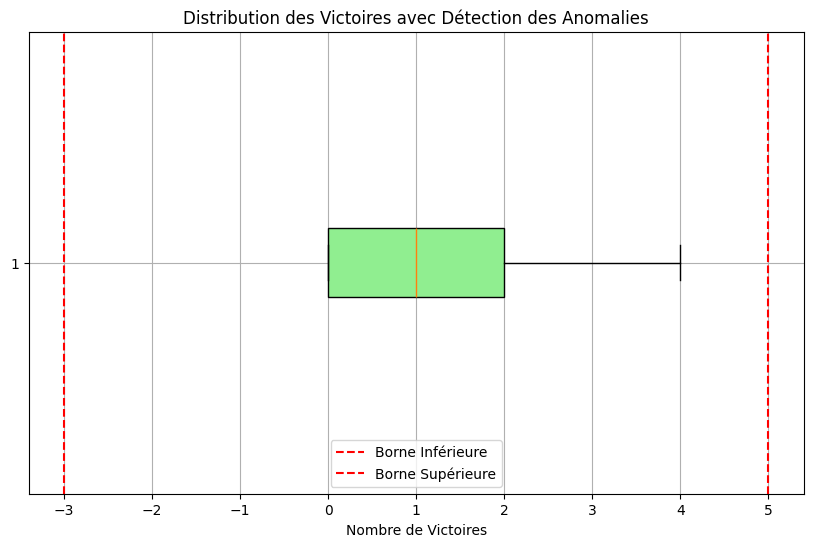

In [6]:
# Question 5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


file_path = "/Users/adrienmiller/Downloads/game_data_complete.csv"
data = pd.read_csv(file_path)

# Définir une fonction pour détecter les anomalies avec l'IQR (Interquartile Range)
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Tâche1 : identifier les valeurs aberrantes dans le temps de jeu
outliers_playtime, lower_playtime, upper_playtime = detect_outliers_iqr(data, 'Temps_Jeu')
print("\nJoueurs avec un temps de jeu anormal :")
print(outliers_playtime[['ID_Joueur', 'Temps_Jeu']])

# Tâche 1 : dentifier les valeurs aberrantes dans les victoires
outliers_victories, lower_victories, upper_victories = detect_outliers_iqr(data, 'Victoires')
print("\nJoueurs avec un nombre de victoires anormal :")
print(outliers_victories[['ID_Joueur', 'Victoires']])

# Tâche 2 : Mettre en évidence les joueurs suspects
# Combine les joueurs suspects des deux analyses
suspicious_players = pd.concat([outliers_playtime, outliers_victories]).drop_duplicates()
print("\nJoueurs suspects identifiés :")
print(suspicious_players[['ID_Joueur', 'Temps_Jeu', 'Victoires']])

# Visualisation des anomalies dans le temps de jeu
plt.figure(figsize=(10, 6))
plt.boxplot(data['Temps_Jeu'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Distribution du Temps de Jeu avec Détection des Anomalies")
plt.xlabel("Temps de Jeu (minutes)")
plt.axvline(x=lower_playtime, color='red', linestyle='--', label='Borne Inférieure')
plt.axvline(x=upper_playtime, color='red', linestyle='--', label='Borne Supérieure')
plt.legend()
plt.grid()
plt.show()

# Visualisation des anomalies dans les victoires
plt.figure(figsize=(10, 6))
plt.boxplot(data['Victoires'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
plt.title("Distribution des Victoires avec Détection des Anomalies")
plt.xlabel("Nombre de Victoires")
plt.axvline(x=lower_victories, color='red', linestyle='--', label='Borne Inférieure')
plt.axvline(x=upper_victories, color='red', linestyle='--', label='Borne Supérieure')
plt.legend()
plt.grid()
plt.show()


Joueurs qui dépensent régulièrement :
ID_Joueur
1001    1300
1002    1700
1003    1500
1005    1050
1006    1800
        ... 
1991     750
1993    2500
1995    1350
1998    1050
1999    2650
Name: Achats_Objets, Length: 500, dtype: int64

Joueurs qui ne dépensent pas :
Series([], Name: Achats_Objets, dtype: int64)

Segments des joueurs :
           ID_Joueur   Temps_Jeu  Victoires  Total_Spent
Segment                                                 
0        1483.467662  123.557338   1.280100  1469.900498
1        1513.305882  117.210971   1.020000  1218.235294
2        1487.286822  119.083784   1.077003  2415.116279


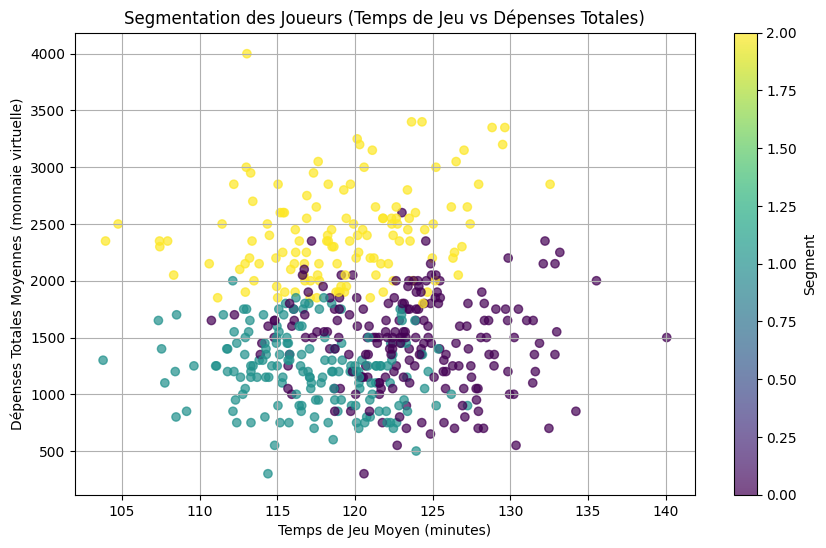

In [7]:
# Question 6
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

file_path = "/Users/adrienmiller/Downloads/game_data_complete.csv"
data = pd.read_csv(file_path)

# Tâche 1 : Identifier les joueurs qui dépensent régulièrement et ceux qui ne dépensent pas
# Calcule les dépenses totales par joueur
total_spent_by_player = data.groupby('ID_Joueur')['Achats_Objets'].sum()

# Classifie les joueurs selon leurs dépenses
regular_spenders = total_spent_by_player[total_spent_by_player > 0]
non_spenders = total_spent_by_player[total_spent_by_player == 0]

print("\nJoueurs qui dépensent régulièrement :")
print(regular_spenders)

print("\nJoueurs qui ne dépensent pas :")
print(non_spenders)

# Tâche 2 : Préparer une segmentation en fonction des habitudes d'achat
# Ajo une colonne "Total_Spent" dans le DataFrame principal
data['Total_Spent'] = data.groupby('ID_Joueur')['Achats_Objets'].transform('sum')

# Crée unesegmentation basée sur les habitudes : temps de jeu, victoires, et dépenses totales
segmentation_data = data.groupby('ID_Joueur').agg({
    'Temps_Jeu': 'mean',
    'Victoires': 'mean',
    'Total_Spent': 'mean'
}).reset_index()

# Normalise les données pour KMeans
scaler = StandardScaler()
segmentation_scaled = scaler.fit_transform(segmentation_data[['Temps_Jeu', 'Victoires', 'Total_Spent']])

# AppliquerKMeans pour la segmentation
kmeans = KMeans(n_clusters=3, random_state=42)
segmentation_data['Segment'] = kmeans.fit_predict(segmentation_scaled)

# Affiche les segments
print("\nSegments des joueurs :")
print(segmentation_data.groupby('Segment').mean())

# Visualistion des segments
plt.figure(figsize=(10, 6))
plt.scatter(
    segmentation_data['Temps_Jeu'], 
    segmentation_data['Total_Spent'], 
    c=segmentation_data['Segment'], cmap='viridis', alpha=0.7
)
plt.title("Segmentation des Joueurs (Temps de Jeu vs Dépenses Totales)")
plt.xlabel("Temps de Jeu Moyen (minutes)")
plt.ylabel("Dépenses Totales Moyennes (monnaie virtuelle)")
plt.colorbar(label="Segment")
plt.grid()
plt.show()